# 1時間目

# カブトガニの側抑制を実験してみよう

カブトガニの側抑制は，空間フィルターと呼ばれる演算で記述できます．
ここでは，あまり複雑に考えないように複眼を1次元にそってきったものを考えます．

計算機上で，これを表現しようとすると，入力は1次元の配列と呼ばれる構造で表されることになります．
配列は python の上では `numpy` と呼ばれるモジュールで扱います．


In [1]:
# とりあえず，使うためのおまじないセクション
import numpy as np    # 数学関数を np として使う
import matplotlib.pylab as plt
from scipy.ndimage.filters import convolve1d  # 1次元の畳み込みを行ってみる

## 入力の設定

まず，　入力は，徐々に明るさが変化していく入力を考えてみましょう．
余力がある場合は，ここらへんをいじって違う入力を考えてみてください．
1次元の入力を考えるとイメージが湧きづらいので，これを画像化したものも一緒に乗せています．

徐々に変化して，変化が終わるようなところで，明るく/暗く 見えるような領域（バンド）が確認できますでしょうか？

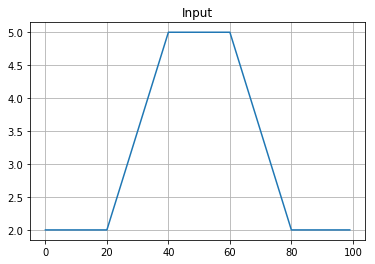

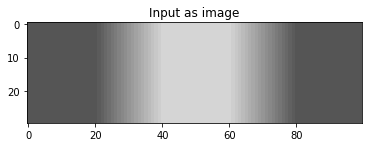

In [2]:
# 入力を作ってみよう， とりあえず１次元が要素からなる配列を
N = 100
N1 = 20
N2 = 40
N3 = 60
N4 = 80
height1 = 2
height2 = 5


#余力があれば入力の変更をしてみよう
input = np.ones(N) * height1
input[N1:N2] = (height2 - height1) / (N2 - N1) * np.arange(N2 - N1) + height1
input[N2:N3] = height2
input[N3:N4] = (height1 - height2) / (N4 - N3) * np.arange(N4 - N3) + height2

plt.plot(input)
plt.title('Input')
plt.grid()

image0 = np.repeat(np.copy(input).reshape(1, len(input)), 30, axis=0)
plt.figure()
plt.title('Input as image')
plt.imshow(image0, cmap='gray', vmin=0, vmax=6)

## 側抑制を畳み込みで考えてみる

次に側抑制を規定する畳み込み演算を考えてみましょう．
側抑制は,コンボリューション（畳み込み）と呼ばれる演算で記述できます．
ここでは，中心対称となるようなものを畳み込み核（フィルタ）を考えてみます．

その心は，中心の正の部分が興奮性の結合を表して，周りの負の部分が抑制性の結合を表します．
これが，ずっと続いています．この結合様式が平行移動しながらずっと続いていくような系になっています．

そこで，まず，この結合様式を配列として表してみましょうというのが，ここの話になります

余力があれば，結合様式を変えて実験してみてください．

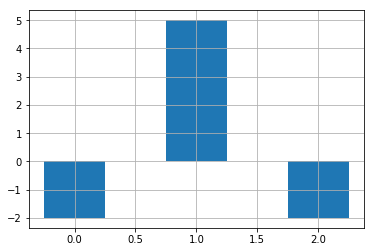

In [3]:
# 畳み込みのフィルタを作ってみる
# 側抑制は真ん中の要素が中心，　周辺が 負（抑制）の成分


# 余力があれば，いろいろ変更してみよう
# 一番簡単なフィルタ
h1 = np.array([ -2, 5, -2])


plt.figure()
plt.bar(np.arange(len(h1)), h1, 0.5)
plt.grid()

## 側抑制の計算

側抑制の計算は *畳み込み* でかけるということを前述しました．
これは， scipy と呼ばれるモジュールにある `convolve1d` という関数を使うことで記述できます．
入力情報は，入力刺激 `input` と 畳み込みを規定するフィルタ `h1` です．

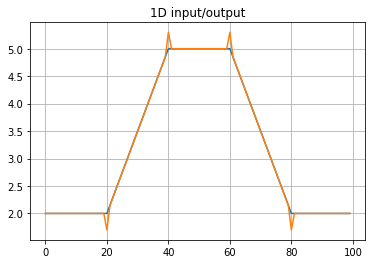

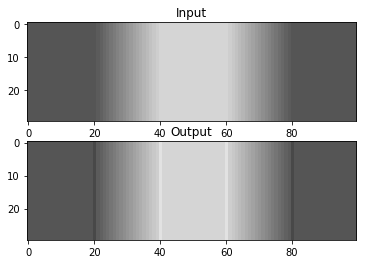

In [4]:
# 側抑制の計算
y1 = convolve1d(input, h1)

# １番目の側抑制の結果
plt.figure()
plt.plot(input)
plt.plot(y1)
plt.grid()
plt.title('1D input/output')
plt.figure()
plt.subplot(2, 1, 1)
plt.title('Input')
plt.imshow(image0, cmap='gray', vmin=0, vmax=6)
#
plt.subplot(2, 1, 2)
plt.title('Output')
image1 = np.repeat(np.copy(y1).reshape(1, len(y1)), 30, axis=0)
plt.imshow(image1, cmap='gray', vmin=0, vmax=6)

## 別のフィルタを使ってみる

ここでは，さらに別のフィルタを作って演算を行ってみてください．

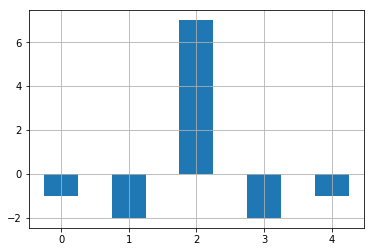

In [5]:
# 畳み込みのフィルタ
# もう少し広い領域から信号をとってみる

h2 = np.array([ -1, -2, 7, -2, -1 ])

plt.figure()
plt.bar(np.arange(len(h2)), h2, 0.5)
plt.grid()

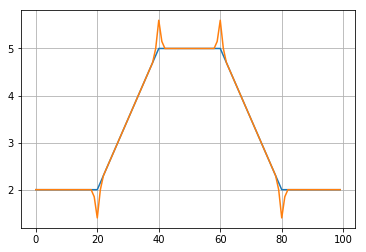

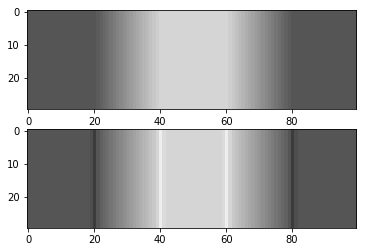

In [6]:
# 側抑制の計算
y2 = convolve1d(input, h2)

# 2番目の側抑制の結果
plt.figure()
plt.plot(input)
plt.plot(y2)
plt.grid()

plt.figure()
plt.subplot(2, 1, 1)
plt.imshow(image0, cmap='gray', vmin=0, vmax=6)
plt.subplot(2, 1, 2)
image2 = np.repeat(np.copy(y2).reshape(1, len(y2)), 30, axis=0)
plt.imshow(image2, cmap='gray', vmin=0, vmax=6)
